# K-Means Clustering

## Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [28]:
dataset = pd.read_csv('Mall_Customers.csv')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])


dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [19]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(dataset)
labels = kmeans.predict(dataset)

centroids = kmeans.cluster_centers_

'''
分三群
針對每一群中的每一個特徵，計算平均值，這些平均值就是每一群的中心點 (因為有5個特徵所以有5個中心點)
'''

print('centroids: {}'.format(centroids))
print('prediction on each data: {}'.format(labels))



centroids: [[104.58823529   0.45588235  41.60294118  62.13235294  47.69117647]
 [ 35.5          0.4         38.37142857  32.57142857  50.21428571]
 [169.40322581   0.46774194  36.37096774  90.43548387  52.93548387]]
prediction on each data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## 範例2 - 分群視覺化 (投影至2D平面)


 ### elbow method 定義最佳 K 

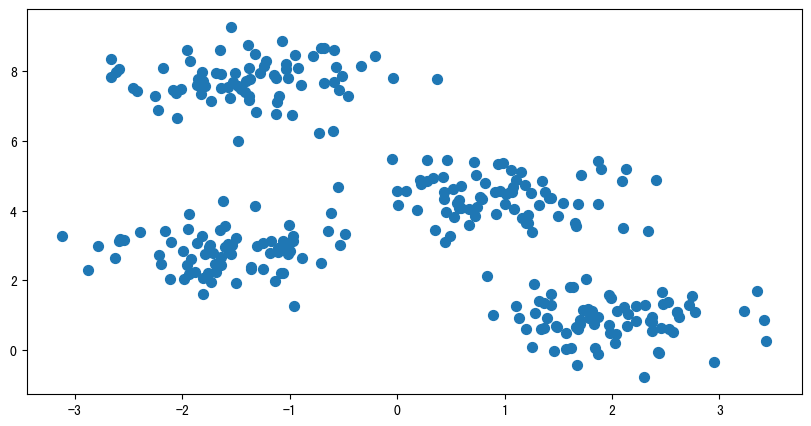

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


# 透過 make_blobs 產生一個資料集(假資料)
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], s=50);

## Using the elbow method to find the optimal number of clusters

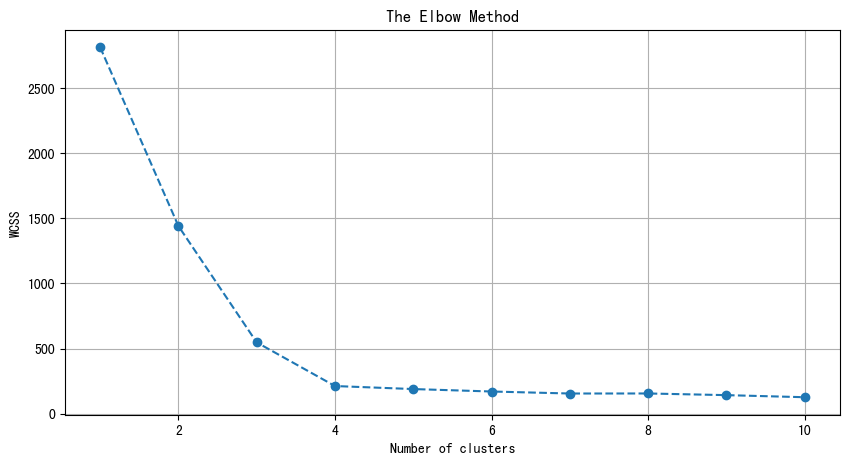

In [39]:
from sklearn.cluster import KMeans


# wcss = within-cluster sums of squares 聚類內誤差平方和
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


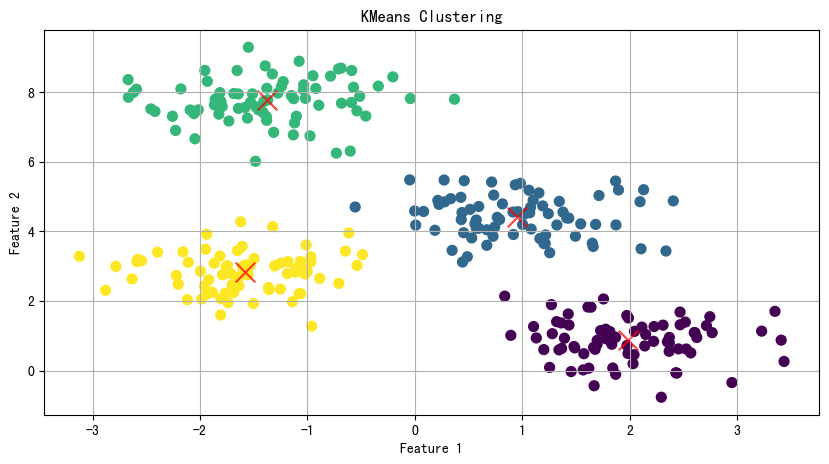

In [36]:
# 繪製 KMeans 集群结果
optimal_clusters = 4  # 根據肘部法則圖選擇的最佳集群數

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 繪製集群結果和質心
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()




## 範例3 - 分群視覺化 (投影至2D平面)


WSS(Within Cluster Sum of Squares)/BSS(Between Cluster Sum of Squares)  
![alt text](./images/silhouette_score.PNG)
ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [45]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)



0.5511916046195917


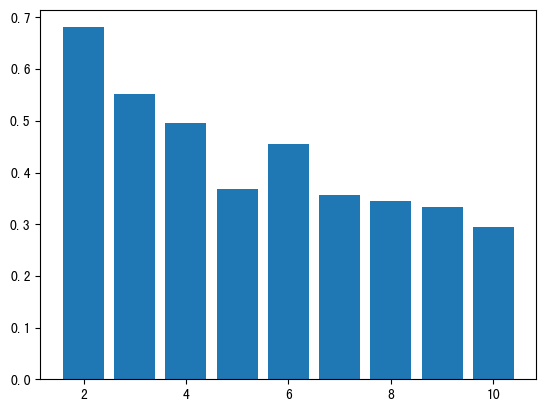

[0.6810461692117462, 0.5511916046195917, 0.4953563285288495, 0.36892049356935425, 0.4552896790569427, 0.3561786628965538, 0.3453360518283621, 0.3340978007667998, 0.29509212115365474]


In [46]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

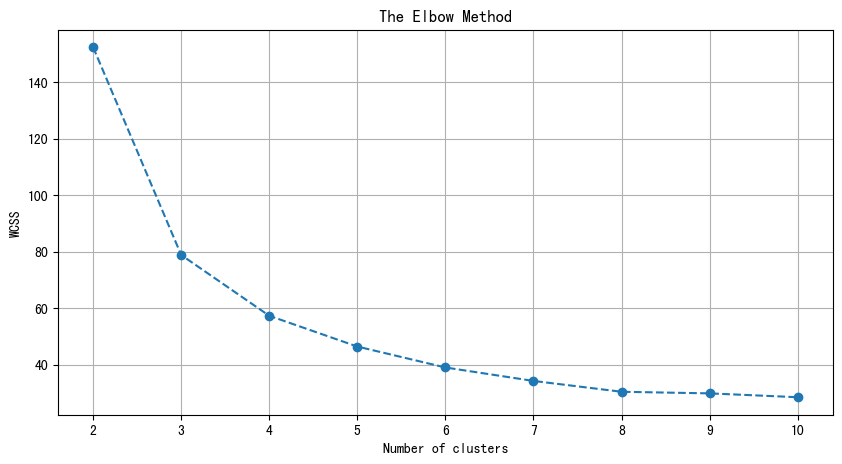

In [67]:
# wcss = within-cluster sums of squares 聚類內誤差平方和
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

由結果來看分兩群是最好的
但是鳶尾花資料即告訴我們實際上只有三種花 (分三群才是正確的答案)

## 透過視覺化方式觀察 KMeans 分群效果和實際上的差異

因為鳶尾花資料有四個特徵如果要視覺化必須要先經過 PCA 降維

In [70]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)



## 繪圖比較


For n_clusters = 2 The average silhouette_score is : 0.7056703225102109
For n_clusters = 3 The average silhouette_score is : 0.5976764219547992
For n_clusters = 4 The average silhouette_score is : 0.5591106064519759
For n_clusters = 5 The average silhouette_score is : 0.5496474874145385
For n_clusters = 6 The average silhouette_score is : 0.5156334265148755


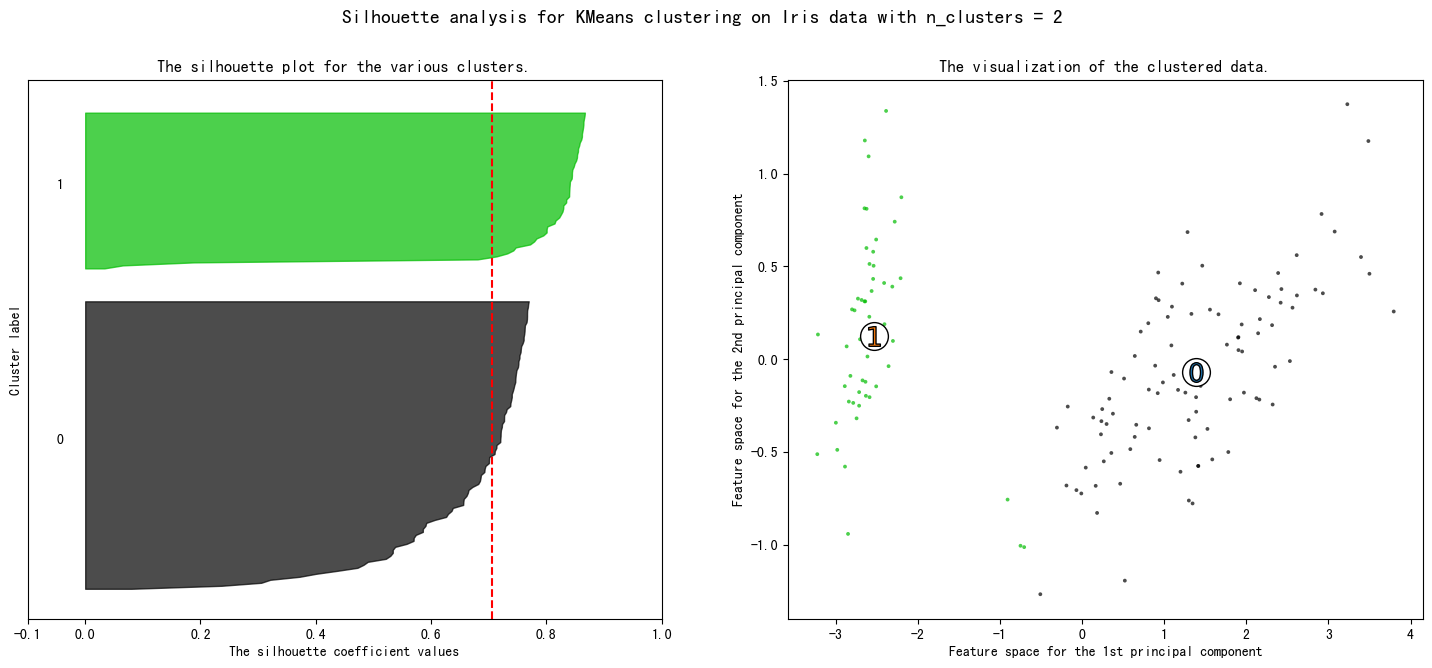

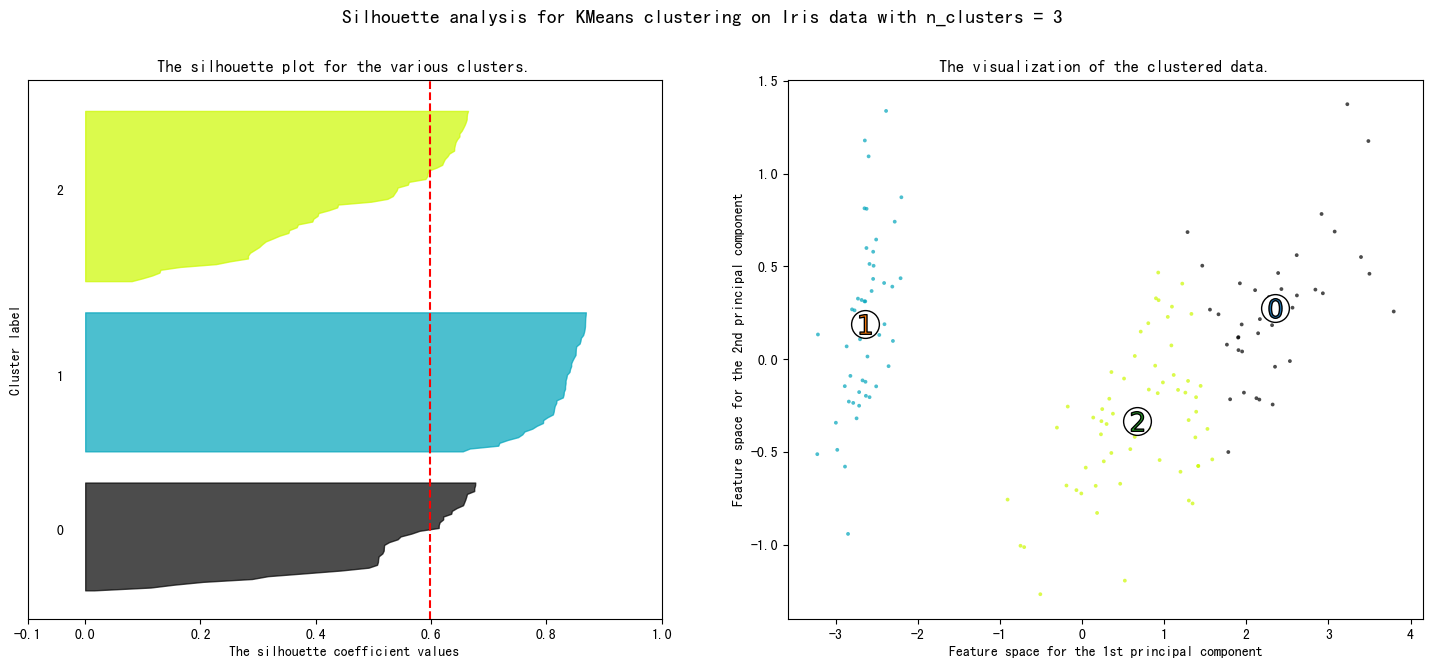

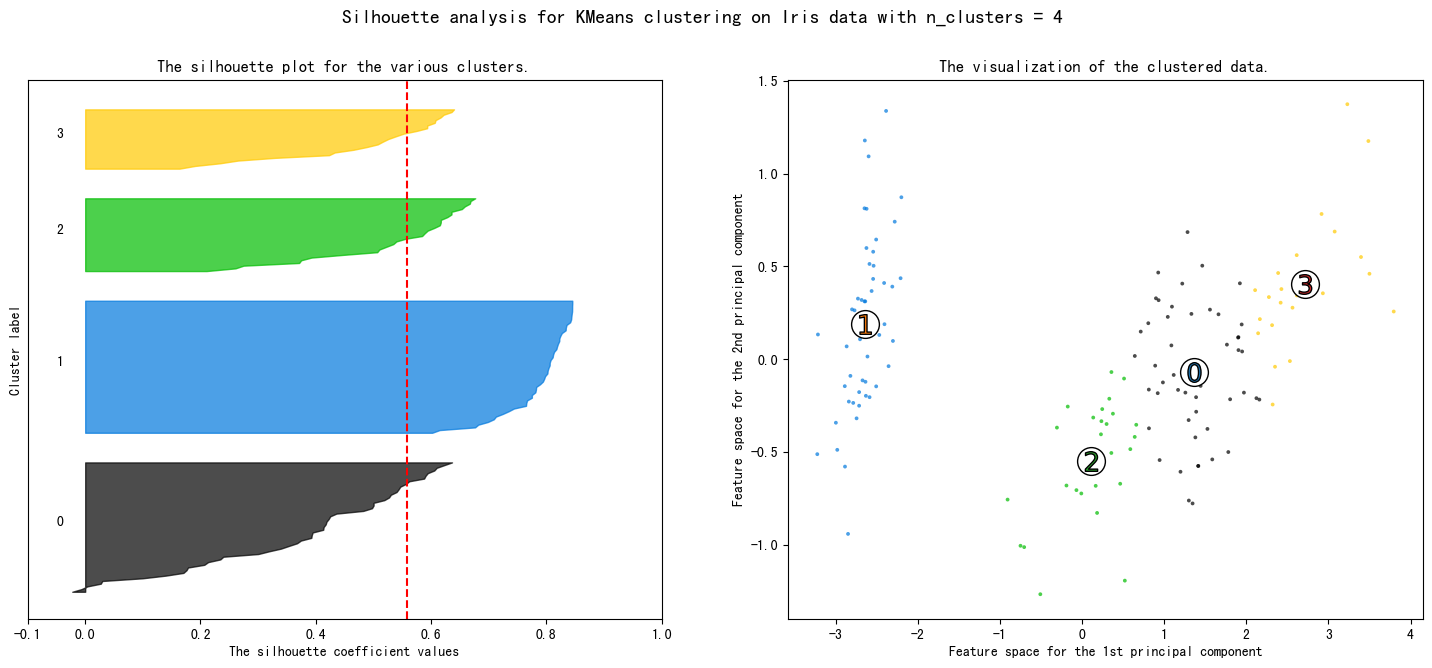

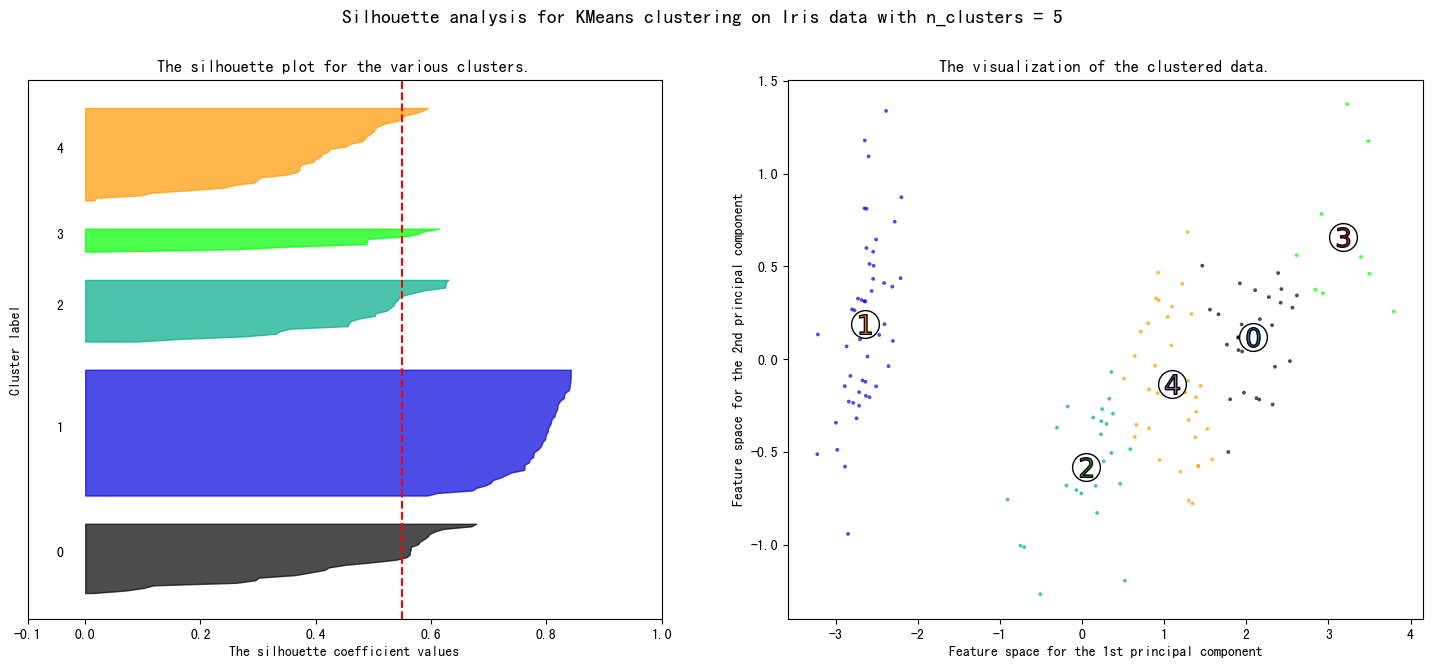

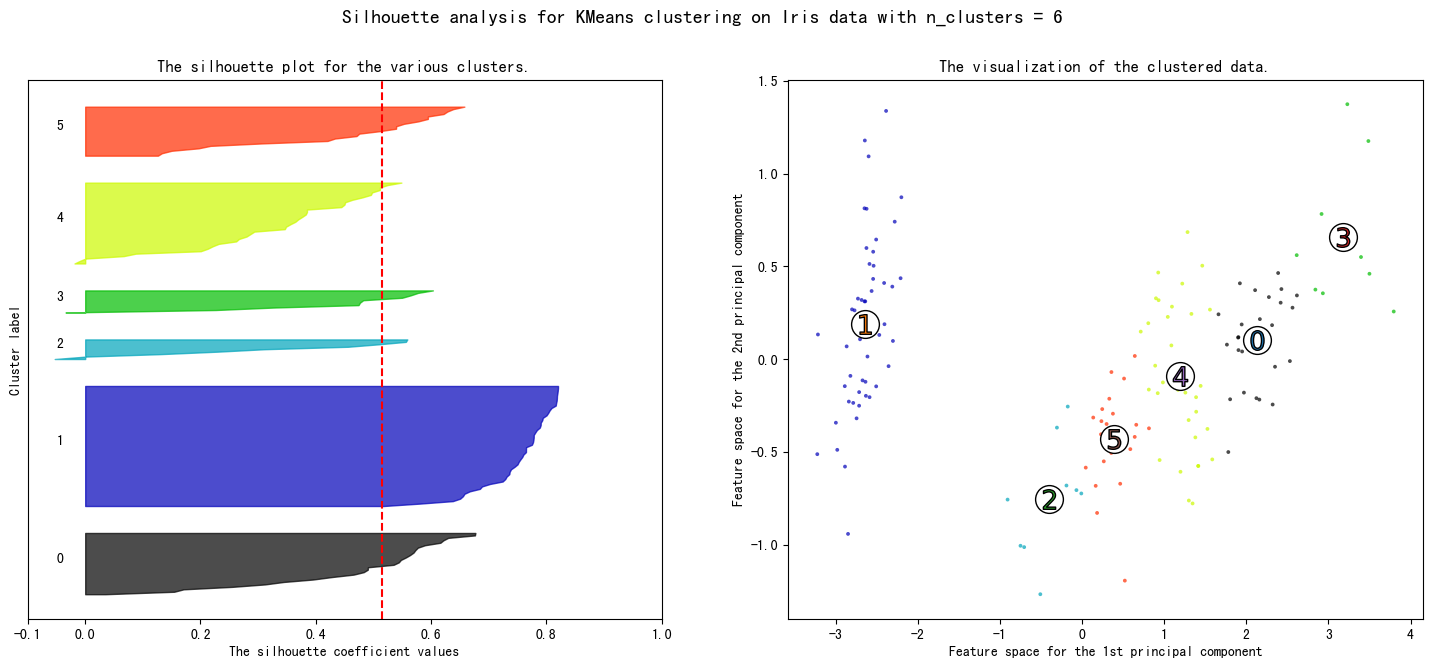

In [71]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_reduced)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=400, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=200, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st principal component")
    ax2.set_ylabel("Feature space for the 2nd principal component")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on Iris data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



以分群的精神來說，我們希望每一個群內的資料點越靠近彼此，而不同群之間的資料點越遠越好。因此，我們希望 silhouette score 越高越好。
但現實世界的數據可能面臨到有些資料集群內的資料點過於相似，導致 silhouette score 過高，這時候我們就需要人工去調整分群的數量，或是使用其他的分群演算法。

實驗告訴我們，分群只是粗略大概的分類，並不是一個精確的科學。因此，我們在使用分群演算法時，應該要有一個大概的方向，並且不要過度依賴分群的結果。
